In [4]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

model_cat = CatBoostRegressor(n_estimators=50000)
model_cat.fit(X, y)

forecast_2023_cat = model_cat.predict(X)

print(forecast_2023_cat)

Learning rate set to 0.001452
0:	learn: 792173.3155855	total: 2.81ms	remaining: 2m 20s
1:	learn: 792131.2281575	total: 5.26ms	remaining: 2m 11s
2:	learn: 792109.0635094	total: 7.7ms	remaining: 2m 8s
3:	learn: 792003.3292502	total: 9.08ms	remaining: 1m 53s
4:	learn: 791916.9468445	total: 10.7ms	remaining: 1m 47s
5:	learn: 791868.8512891	total: 13.4ms	remaining: 1m 51s
6:	learn: 791833.1149365	total: 15.5ms	remaining: 1m 50s
7:	learn: 791773.1370744	total: 17.6ms	remaining: 1m 50s
8:	learn: 791716.9334804	total: 19.4ms	remaining: 1m 47s
9:	learn: 791687.4072830	total: 21.4ms	remaining: 1m 46s
10:	learn: 791567.0177097	total: 23.3ms	remaining: 1m 46s
11:	learn: 791530.7341670	total: 25.2ms	remaining: 1m 44s
12:	learn: 791436.2939357	total: 26.8ms	remaining: 1m 43s
13:	learn: 791401.5010719	total: 29.5ms	remaining: 1m 45s
14:	learn: 791352.9856087	total: 31.8ms	remaining: 1m 46s
15:	learn: 791273.4294281	total: 33.6ms	remaining: 1m 44s
16:	learn: 791238.3191805	total: 35.4ms	remaining: 1m 

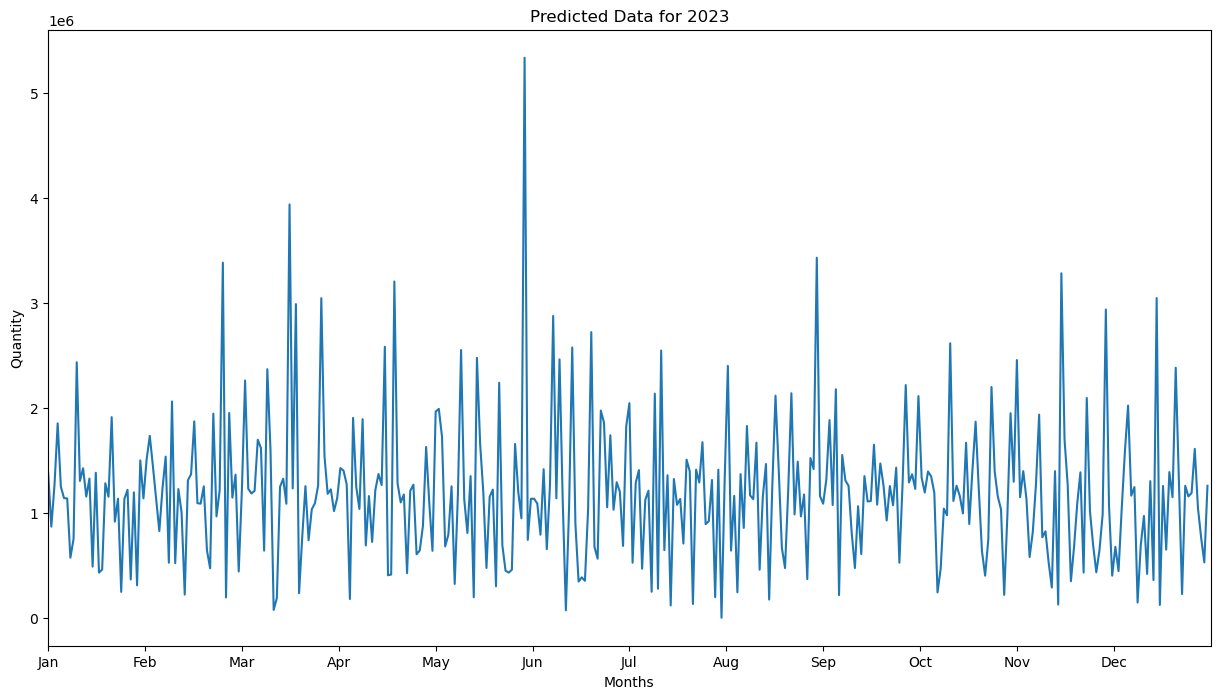

In [5]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(days, forecast_2023_cat, marker='')
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.title('Predicted Data for 2023')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.show()

In [6]:
import pandas as pd

df2 = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")

new_df = pd.DataFrame(forecast_2023_cat, columns=["2023"])

result_df = pd.concat([df2, new_df], axis=1)

result_df.to_csv(r"D:\NATPAC\Datasets\CatBoost\2023.csv", index=False)

print(result_df)

    Month_Day     2018     2019     2020     2021     2022          2023
0       01-01   337485   686993  1284272  1244317  1285112  1.386942e+06
1       01-02  1030556  1920106   985410  1499299   805926  8.703654e+05
2       01-03  1030556  1598395   985410  1115398  1198180  1.267312e+06
3       01-04   697207  1621244   110652   213313  2054215  1.853981e+06
4       01-05  1464201   148152   985410  1020265  1198180  1.249788e+06
..        ...      ...      ...      ...      ...      ...           ...
361     12-27   125924   643626   985410  2648166  1669346  1.611026e+06
362     12-28  2477337   995967  3430383  1001102  1113987  1.048108e+06
363     12-29  1030556   392141   985410   966369   278274  7.662052e+05
364     12-30  1030556  1054901   134188   178873   416466  5.298365e+05
365     12-31   903441  1088381   985410  1001102  1218553  1.259296e+06

[366 rows x 7 columns]
